# Objective
- to develop a regression model that predicts pc prices
- There are many shops that might scam people of pc prices as the price of pc is not easy to understand
- Hence, this model hopes to predict the price of a pc based on its specs so that intrested buyers so that they know what price range to search for according to the specs that they use
- This model must make as little error as possible as it might cause buyers to make wrong decision

In [1]:
import phik
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
rng = np.random.RandomState(1)


In [2]:
data = pd.read_csv("Medicalpremium.csv")
data

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [3]:
data.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


- min age : 18 , max age :  66
- min height 145 ,max height max 188

- min weight 51 max weight 132 
- min no surgery 0 , max surgery is 3 



In [4]:
for col in data.columns:
    print('Unique', col , 'Values')
    print( data[col].unique() )
    print(col , 'has' , data[col].nunique() , 'unique values')
    print()

Unique Age Values
[45 60 36 52 38 30 33 23 48 66 24 46 18 42 57 21 49 20 35 53 31 22 26 28
 64 50 44 58 43 25 54 63 61 41 55 19 40 32 27 34 59 29 47 39 37 51 56 62
 65]
Age has 49 unique values

Unique Diabetes Values
[0 1]
Diabetes has 2 unique values

Unique BloodPressureProblems Values
[0 1]
BloodPressureProblems has 2 unique values

Unique AnyTransplants Values
[0 1]
AnyTransplants has 2 unique values

Unique AnyChronicDiseases Values
[0 1]
AnyChronicDiseases has 2 unique values

Unique Height Values
[155 180 158 183 166 160 150 181 169 182 175 186 178 184 149 154 156 163
 151 172 162 153 168 152 161 157 147 173 179 165 174 185 177 164 148 170
 187 167 159 188 171 176 146 145]
Height has 44 unique values

Unique Weight Values
[ 57  73  59  93  88  69  54  79  74  67  97  76  68  82  61  81  92  83
  58  96  91  85  55  78  56  77  63  75  72  70  80  60  53  94  84  87
  64  95  66  62  86  90  65 116 118 110 121  98 104  89  71 106  99 119
 107 129 109 100 127 132 120 128 114 123 

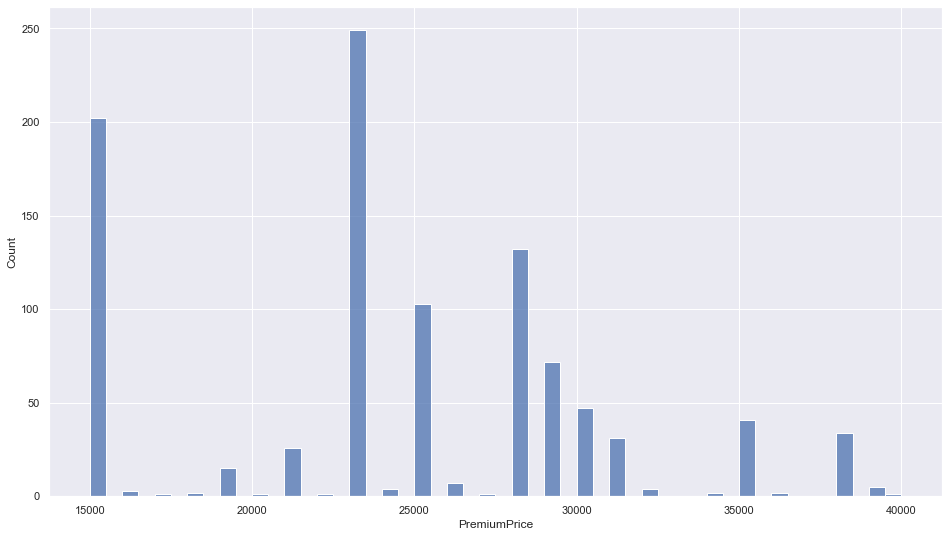

In [45]:
plt.figure(figsize = (16,9))
sns.histplot( x = 'PremiumPrice' , data = data ,binwidth = 500)
plt.show() 

### Outlier analysis
- Proprotion of each class 

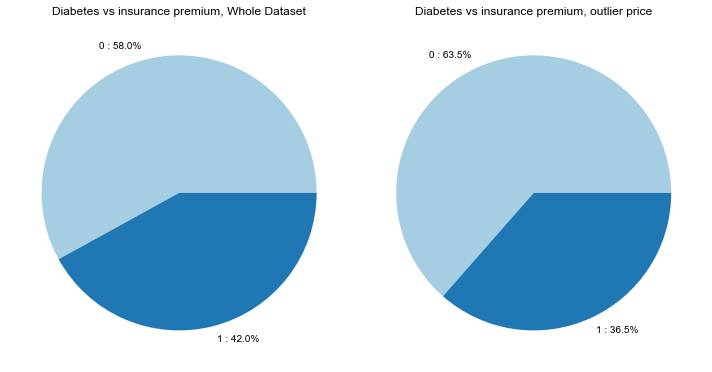

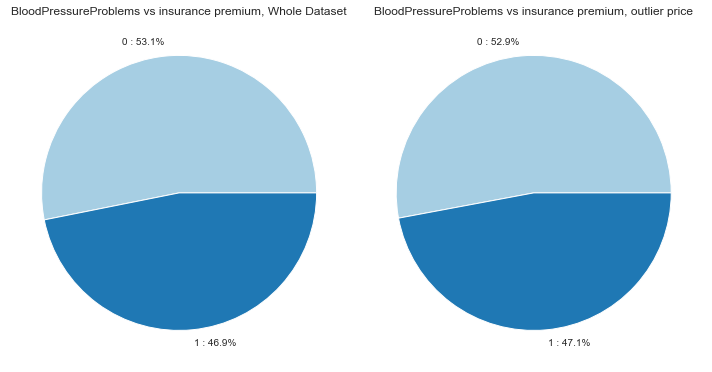

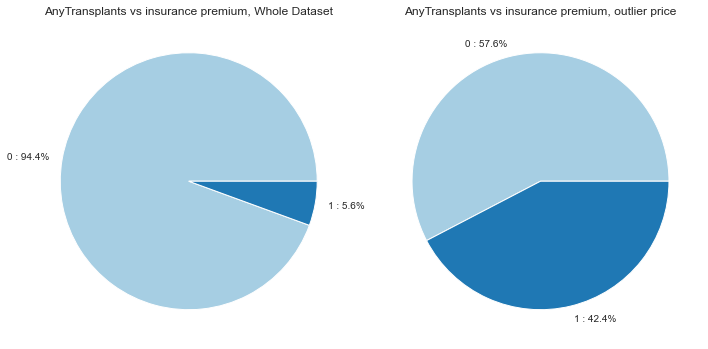

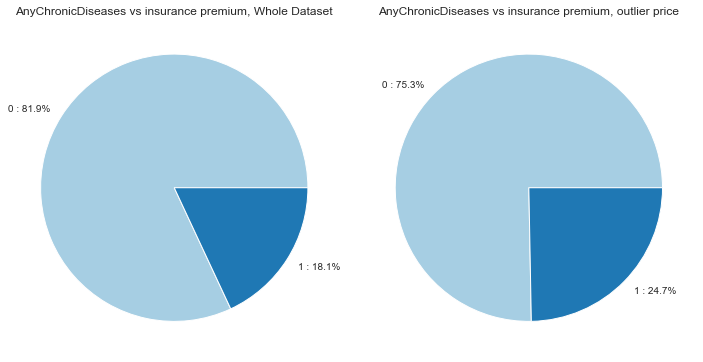

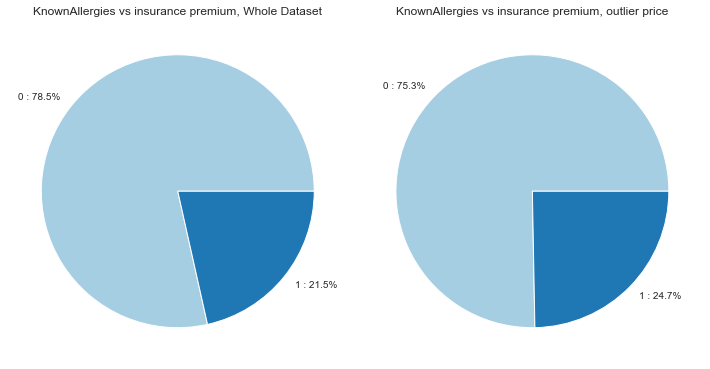

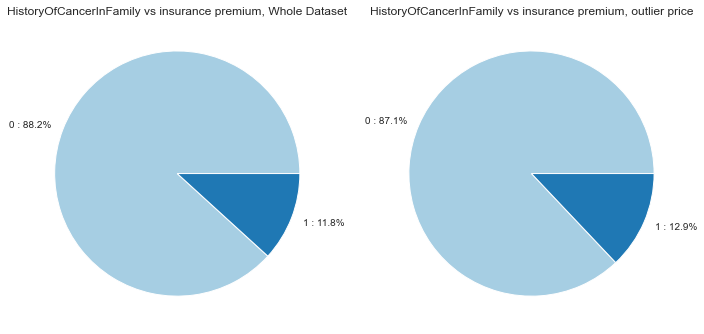

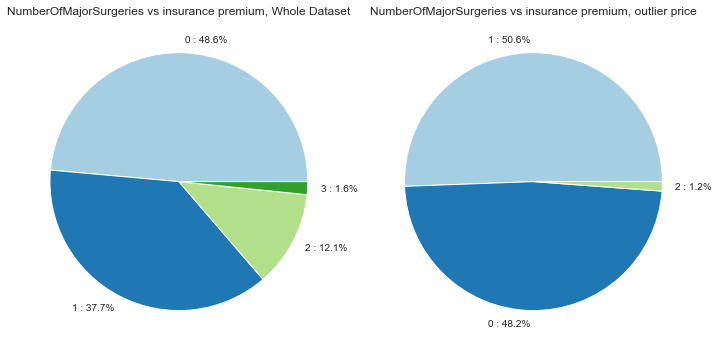

In [6]:
higher = data[ data.PremiumPrice > 33000] #get subset of data with higher insurance premiums 
cat_col = ['Diabetes',	'BloodPressureProblems',	'AnyTransplants',	'AnyChronicDiseases',		'KnownAllergies'	,'HistoryOfCancerInFamily',	'NumberOfMajorSurgeries']

for i, col in enumerate(cat_col):
    plt.figure(figsize=(10,20))
    # plt.suptitle( f'{col}')

    sns.set_palette(sns.color_palette("Paired"))
    ax = plt.subplot(1,2,1)
    ax.set_title(col + ' vs insurance premium, Whole Dataset')
    
    # sns.countplot(x= col, data = data )
    
    counts = data[col].value_counts(normalize= True)
    label  = pd.Series( counts.index).apply( lambda x :f'{x} : {round(100*counts.loc[x] , 1)}%')
    plt.pie( x =counts , labels = label)
    
    plt.subplot( 122 )
    
    plt.title(col + ' vs insurance premium, outlier price')

    counts = higher[col].value_counts(normalize= True)
    label  = pd.Series( counts.index).apply( lambda x :f'{x} : {round(100*counts.loc[x] , 1)}%')
    plt.pie( x =counts , labels = label)
    sns.set_style('whitegrid')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

Objective: To determine if there is a reason why insurance premiums are so high for some (> $33000) 

Glossary : 'Outliers' refer to the data points with insurance price higher than $33000 

> Any Transplants 
- For the outliers , they have significantly higher proprotion of those who did for the whole dataset. (42% vs 5.6%) 
- Having received an organ transplant indicates a serious medical condition and insurance most likely classify such clients as 'high risk' and thus the expensive premiums


> Diabetes
- For the 'outliers', they have higher proprotion of diabetic patients 42% vs 36.5%

These outliers cannot be removed, as the model cannot learn that having received an organ transplant before leads to higher insurance premiums if they are dropped



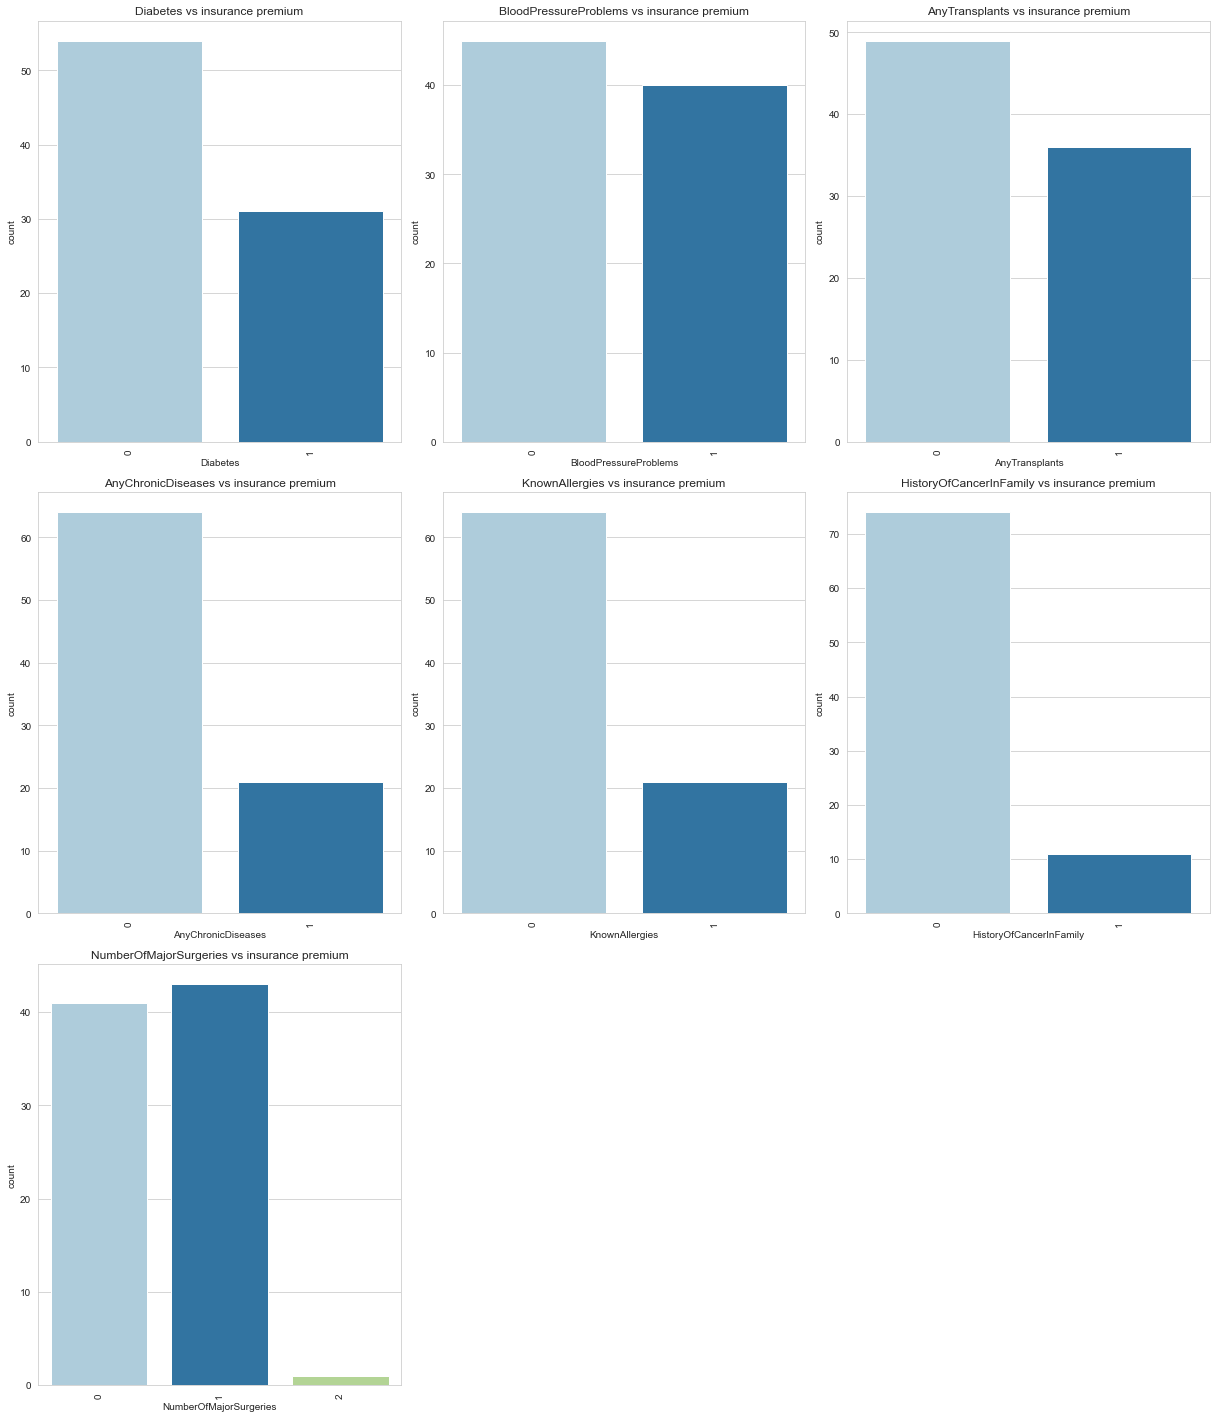

In [7]:
cat_col = ['Diabetes',	'BloodPressureProblems',	'AnyTransplants',	'AnyChronicDiseases',		'KnownAllergies'	,'HistoryOfCancerInFamily',	'NumberOfMajorSurgeries']
plt.figure(figsize=(17,26))

for i, col in enumerate(cat_col):

    sns.set_palette(sns.color_palette("Paired"))
    ax = plt.subplot(4,3,i+1)
    ax.set_title(col + ' vs insurance premium')
    
    sns.countplot(x= col, data = higher )
    sns.set_style('whitegrid')
    plt.xticks(rotation=90)
    plt.ylabel("count")
plt.tight_layout()
plt.show()

interval columns not set, guessing: ['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice']


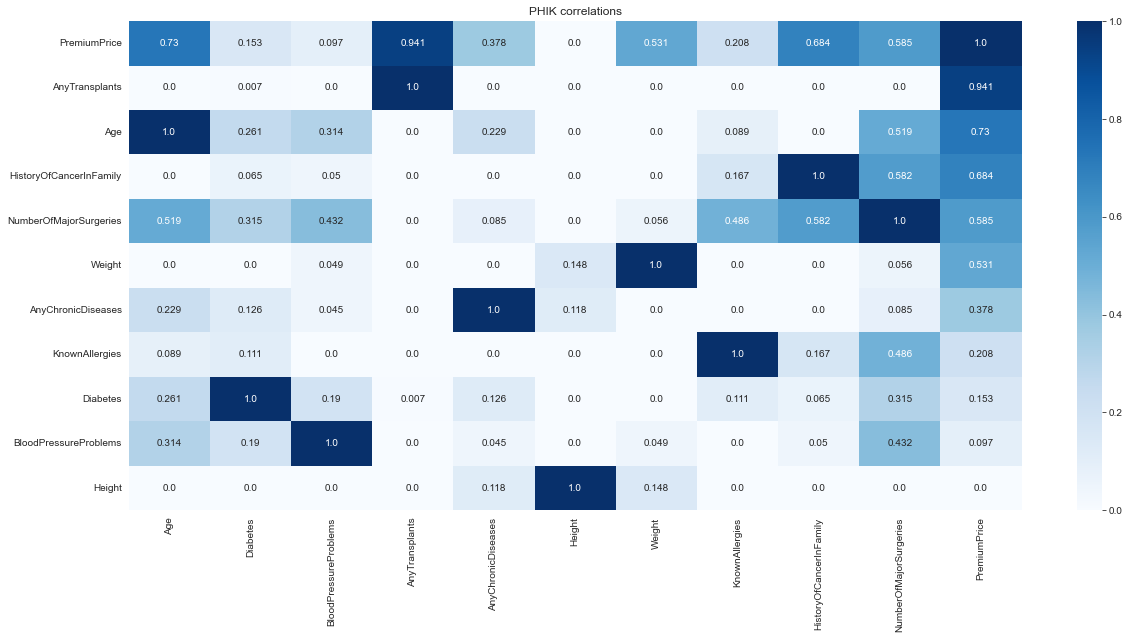

In [8]:
plt.figure( figsize = ( 20,9))
plt.title( 'PHIK correlations')
corr = np.round(data.phik_matrix() , 3  )
corr = corr.sort_values('PremiumPrice', ascending=False) 
sns.heatmap(corr, fmt = ''  , cmap="Blues"  , annot = corr)


plt.show()


- Any transplants have highest correlation with the target 
- Followed by age and the history of transplant in family

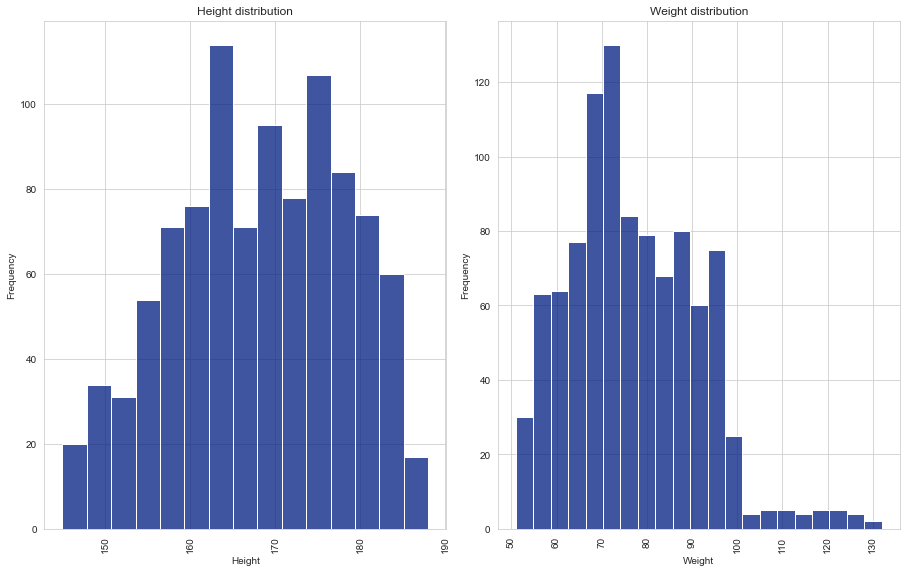

In [9]:
plt.figure(figsize=(19,23))
concol = [ 'Height',	'Weight']
for i, col in enumerate(concol):

    sns.set_palette(sns.color_palette("dark"))
    ax = plt.subplot(3,3,i+1)
    ax.set_title(col + ' distribution')
   # temp = data.groupby(col)['Price ($)'].mean().sort_values(ascending = False)
    sns.histplot(x=col , data = data )
    plt.xticks(rotation=90)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

- Although there are some abnormally high weights for those above 120KG, it is still valid weight and most likely also contribute to high insurance premiums 


Outlier 

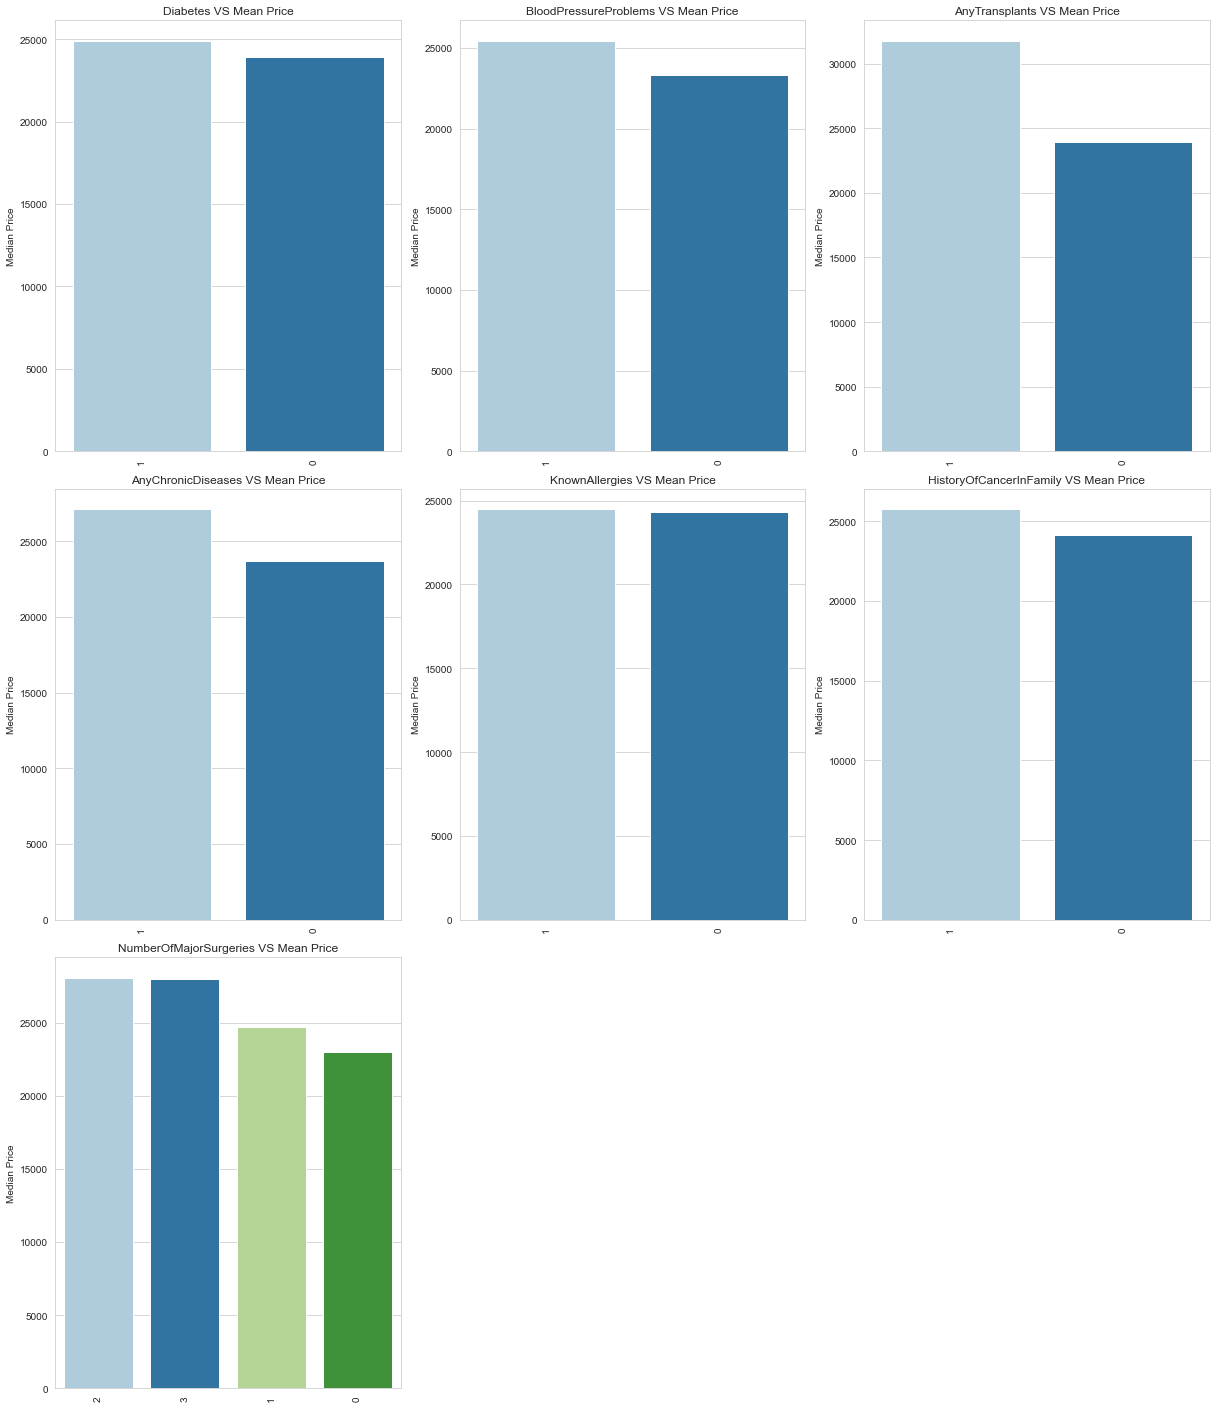

In [10]:
cat_col = ['Diabetes',	'BloodPressureProblems',	'AnyTransplants',	'AnyChronicDiseases',		'KnownAllergies'	,'HistoryOfCancerInFamily',	'NumberOfMajorSurgeries']
plt.figure(figsize=(17,26))

for i, col in enumerate(cat_col):

    sns.set_palette(sns.color_palette("Paired"))
    ax = plt.subplot(4,3,i+1)
    ax.set_title(col + ' VS Mean Price')
    temp = data.groupby(col)['PremiumPrice'].mean().sort_values(ascending = False)
    
    sns.barplot(x=list(map(str, temp.index)) , y = temp , ax = ax)
    sns.set_style('whitegrid')
    plt.xticks(rotation=90)
    plt.ylabel("Median Price")
plt.tight_layout()
plt.show()

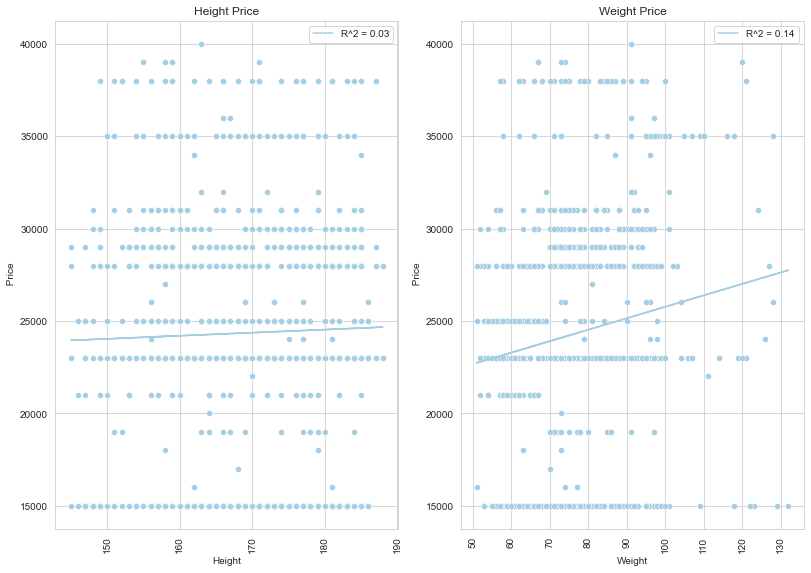

In [11]:
cols = [ 'Height',	'Weight']
plt.figure(figsize=(17,23))

for i, col in enumerate(cols):

    sns.set_palette(sns.color_palette("Paired"))
    ax = plt.subplot(3,3,i+1)
    ax.set_title(col + ' Price')
    #temp = data.groupby(col)['Price ($)'].mean().sort_values(ascending = False)
    m,c = np.polyfit(data[col],data['PremiumPrice'],1)
    x = data[col]
    y = data[col]*m + c 
    sns.scatterplot(x=col , y = 'PremiumPrice' , ax = ax , data = data )
    ax.plot(x ,y   , label = fr'R^2 = { data.corr().loc[col , "PremiumPrice"] :.2f}' )
    ax.legend() 
 #   sns.set_style('whitegrid')
    plt.xticks(rotation=90)
    plt.ylabel(" Price")
plt.tight_layout()
plt.show()

### Data Engineering - BMI 
>  weight (kg) / [height (m)]**2

According to the [NHS](https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/), BMI indicates whether someone is obese. 
Insurance companies use this information , to determine the cost of the premium as obese have higher chance of dying.  


| BMI range| Indication |
| --- | --- |
| BMI < 18.5 | Underweight | 
| 18.5  < BMI < 24.9 | Healthy |
| 25  < BMI < 29.9 | Overweight |
| 30  < BMI < 39.9 | Obese|

In [12]:
data['bmi'] =data.Weight / ((data.Height/100)**2 )
data.drop(columns = [ 'Height'], inplace = True)

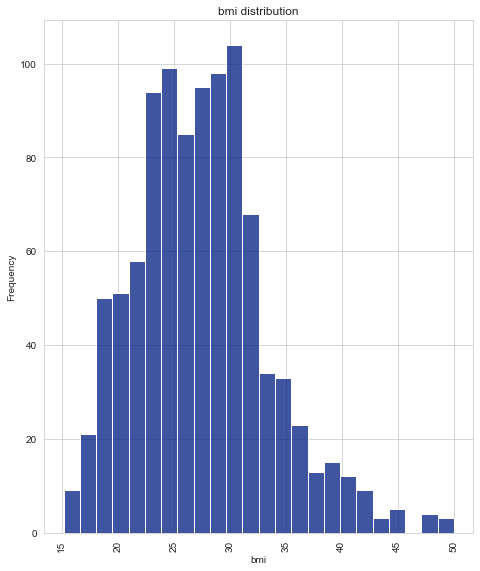

In [13]:
plt.figure(figsize=(19,23))
concol = [ 'bmi']
for i, col in enumerate(concol):

    sns.set_palette(sns.color_palette("dark"))
    ax = plt.subplot(3,3,i+1)
    ax.set_title(col + ' distribution')
   # temp = data.groupby(col)['Price ($)'].mean().sort_values(ascending = False)
    sns.histplot(x=col , data = data )
    plt.xticks(rotation=90)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder , RobustScaler , StandardScaler
from sklearn.metrics import mean_squared_error , make_scorer ,mean_absolute_error ,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
X,y = data.drop(columns = ['PremiumPrice']) , data['PremiumPrice']

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.2    , random_state = rng)

column_trans_scale = make_column_transformer(
    (StandardScaler() , ['Age','Weight']),
    remainder = 'passthrough',
    sparse_threshold=0
    )

In [47]:
# from sklearn.pipeline import Pipeline
# from mapie.regression import  MapieRegressor
# import xgboost
# pipe = Pipeline([('cleaning' , column_trans_scale ) , (xgboost.XGBRegressor(random_state = rng).__class__.__name__.replace('Regressor' , '') ,MapieRegressor(xgboost.XGBRegressor(random_state = rng)) )])

# results = pipe.fit(X_train , y_train)
# onehundredconfidence, results  = pipe.predict(X_train , alpha = 0.85)
# results 

In [48]:
# custom_regression_mean_width_score(0.2)(pred[:, 0, 0], pred[:, 1, 0])

In [49]:
# np.nanpercentile(data.PremiumPrice, 0.75) - np.nanpercentile (data.PremiumPrice , 0.25)

In [50]:
# from mapie.metrics import regression_coverage_score
# def custom_regression_coverage_score(alpha = 0.05):
#     def inner(estimator, X,y):
#         _, pred = estimator.predict(X, alpha = alpha)
#         return regression_coverage_score(y, pred[:, 0, 0], pred[:, 1, 0])
    
    
#     return inner 

In [51]:
# from mapie.metrics import regression_mean_width_score
# def custom_regression_mean_width_score(alpha = 0.05):
#     def inner(estimator, X,y):
#         _, pred = estimator.predict(X, alpha = alpha)
#         return -regression_mean_width_score( pred[:, 0, 0], pred[:, 1, 0])
    
    
#     return inner 

- One hot encode the sex column 
-  smoker column, where no natural order exists  

# Modelling

#### Metric 

$$\mathrm{ Mean Squared Error} = \frac{\sum_{i=1}^{N}\left(y_{i}-\hat{y}_{i}\right)^{2}}{N}$$

$$\mathrm{Mean Absolute Error } = \frac{\sum_{i=1}^{D}|x_i-y_i|}{N}$$
- MSE and MAE are 2 methods to find the average error made by the regressor per data point 
- Using squaring or absolute value, they make the residual positive, regardless of whether the predicted value of y is above or below the actual value of y 
- However, MAE is easier to intepret as the numbers are smaller. Hence MAE is used

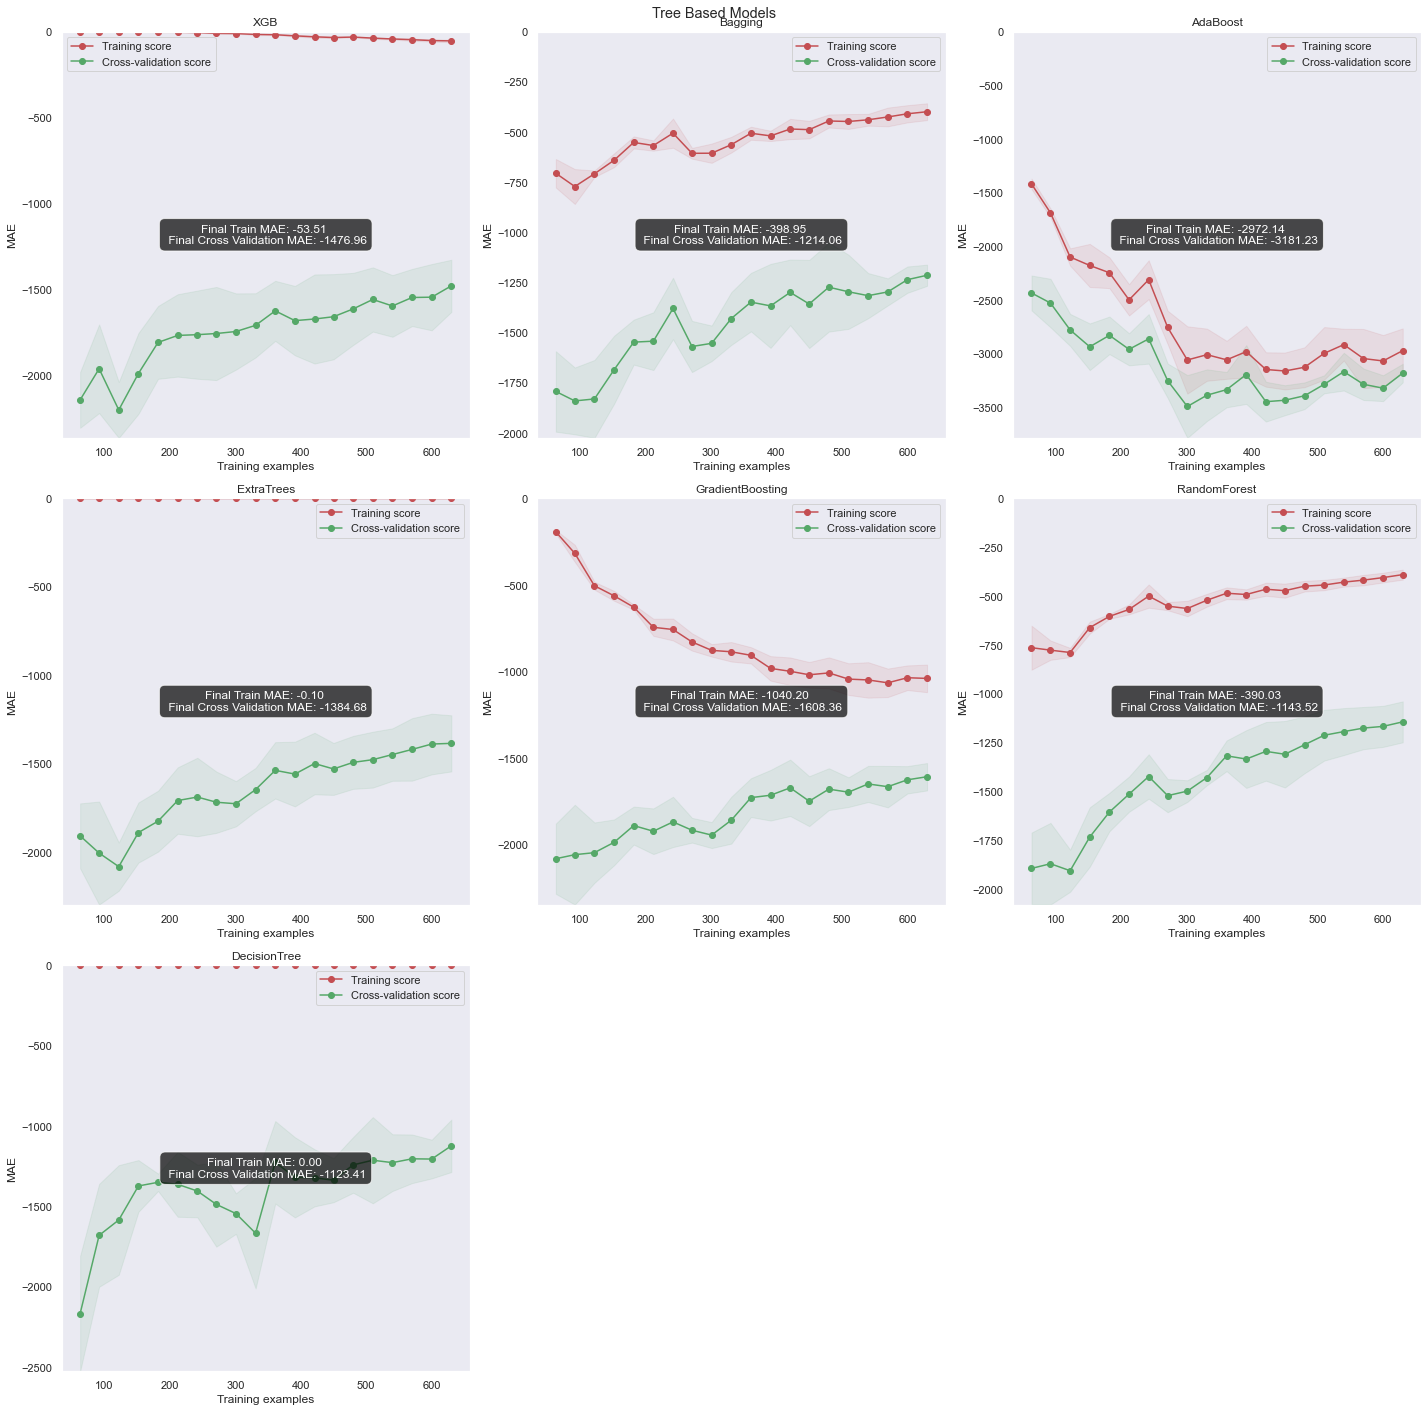

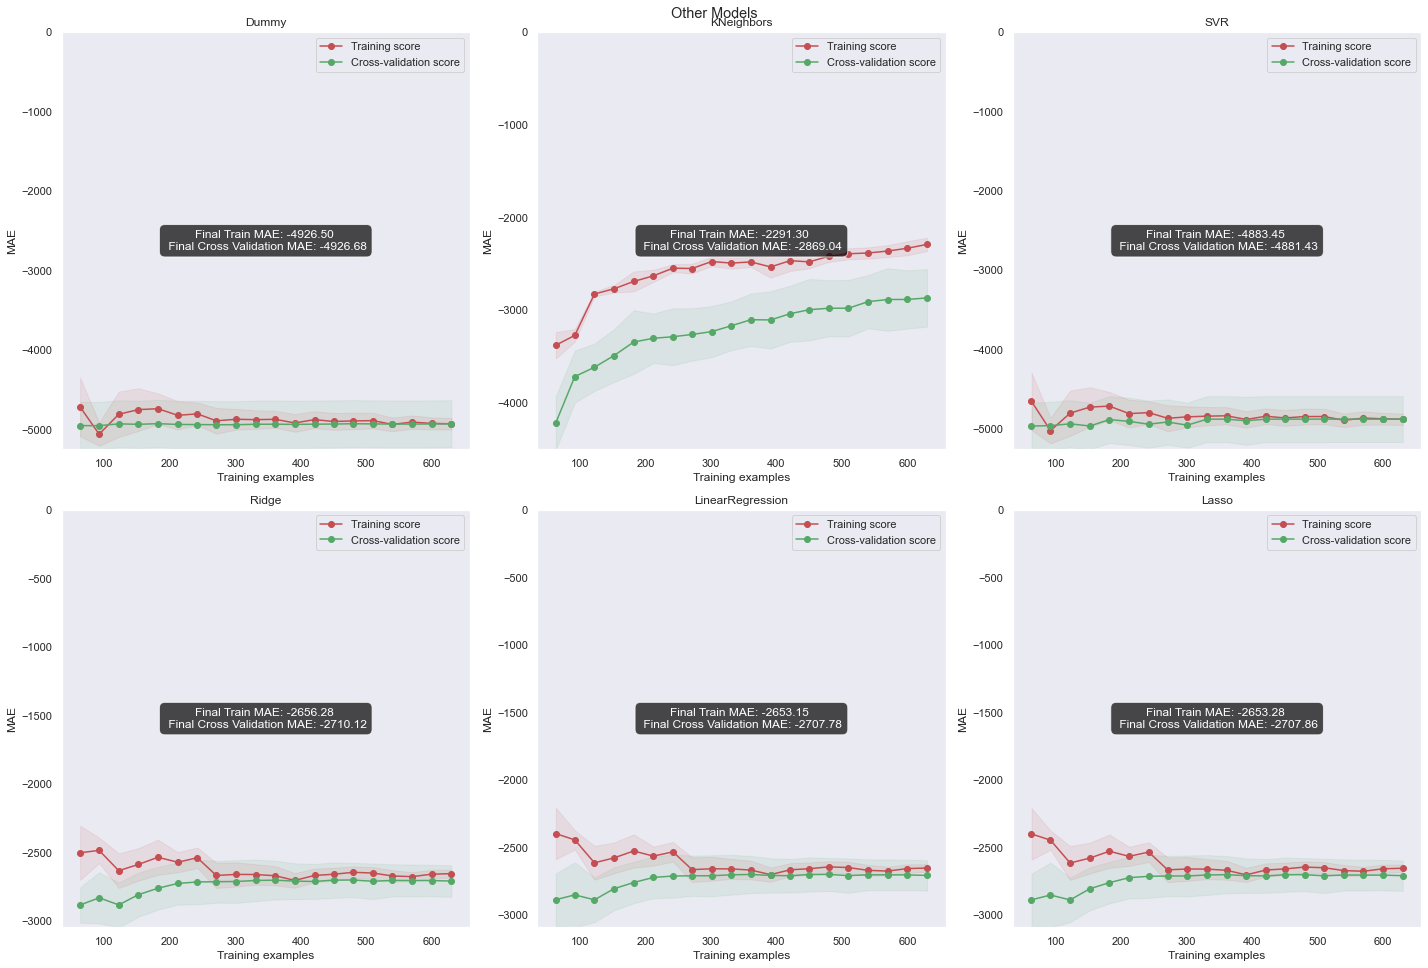

In [17]:
import xgboost
import mapie 
def plot_learning_curve(
    X,
    y,
    estimator  = None,

    ax=None,
    ylim=None,
    steps = None,
    bottom = None ,
    metric = None 
):

    if steps is not None and estimator is None :
        ax.set_title(steps[-1][0])

        estimator = Pipeline(steps)
    else:
        ax.set_title(estimator.__class__.__name__.replace('Regressor' , ''))

    if ax is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    if ylim is not None:
        axes[0].set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("MAE")

    train_sizes, train_scores, test_scores= learning_curve(
        estimator,
        X,
        y,
        cv=5,
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 20),
        scoring =metric,
        error_score = 'raise', 
        random_state= rng
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    # Plot learning curve
    if bottom is  None :
        bottom =  min( [ np.min( train_scores_mean) , np.min(train_scores_mean - train_scores_std) ,np.min( test_scores_mean) , np.min(test_scores_mean - test_scores_std)  ])
    ax.set_ylim(top = 0   , bottom =  bottom)
    
    
    labelx = (np.min(train_sizes) + np.max(train_sizes ))/2
    labely = bottom/2
    ax.grid()

    ax.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    ax.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    ax.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    ax.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    ax.legend(loc="best")
    ax.annotate(f"Final Train MAE: {train_scores_mean[-1]:.2f} \n Final Cross Validation MAE: {test_scores_mean[-1]:.2f}" , (labelx,labely), c = "white" , ha = 'center',va ='center' , bbox = dict(fc = "black", alpha = 0.7, boxstyle = "Round, pad=0.45") )

    return plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import fbeta_score , make_scorer
from sklearn import linear_model as lin 
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import RobustScaler , FunctionTransformer 
import seaborn as sns 
from sklearn.tree import DecisionTreeRegressor
sns.set() 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import * 
from sklearn.base import BaseEstimator,TransformerMixin

mae = make_scorer(mean_absolute_error, greater_is_better=False )

        
plt.figure(figsize = (20,20))

plt.gcf().suptitle('Tree Based Models')
treebasedmodels = [(xgboost.XGBRegressor(random_state = rng)) , BaggingRegressor(random_state = rng) , AdaBoostRegressor(random_state = rng) , ExtraTreesRegressor(random_state = rng) ,GradientBoostingRegressor(random_state = rng) ,RandomForestRegressor(random_state = rng)  , DecisionTreeRegressor(random_state = rng) ]
for i , m in enumerate(treebasedmodels):
    plot_learning_curve(X = X_train, y = y_train , ax = plt.subplot(3,3, i+1) ,steps = [('cleaning' , column_trans_scale ) , (m.__class__.__name__.replace('Regressor' , '') , m)] , metric = mae )
    

plt.tight_layout()
plt.show() 
plt.figure(figsize = (20,20))

plt.gcf().suptitle('Other Models')

distancedbasedmodels = [DummyRegressor() , KNeighborsRegressor() ,  SVR() ,  lin.Ridge() , lin.LinearRegression()  , lin.Lasso()  ]
for i , m in enumerate(distancedbasedmodels):
    plot_learning_curve( X = X_train, y = y_train , ax = plt.subplot(3,3, i+1) , steps  = [('cleaning' , column_trans_scale ) , (m.__class__.__name__.replace('Regressor' , '') , m)] , metric  = mae )

plt.tight_layout()
plt.show() 


## Choosing a model
### Severely Underfitting Models
They are models that have both poor cross validation and train MAE
1. `K-neighbours`
2. `SVR`
3. `DummyClassifier`
4. `Ridge`
5. `Linear`
6. `Lasso`

<br> 

`DummyRegressor` Predicts based on the mean of the dataset, as the distribution of price is non gaussian, but  right skwed, it leads to large errors and a large RMSE


`Kneighbours Regressor`,`LinearRegression` , `Lasso`  , `Ridge` and `SVR`  underfitting,as they are unable to capture the non linear relationship between the features and insurance premium price



### Tree Based Models

`XGBoost` , `AdaBoost` also Overfit  
  `Extra Trees` ,`Gradient Boosting` perform similarly with  underfitting

`Decision Tree` , `RandomForest` and `BaggingRegressor`  is chosen to be tuned as they have the best cross validation MAE




### Tuning Decision Tree

In [18]:
# min_samples_split = 500 : This should be ~0.5-1% of total values. Since this is imbalanced class problem, we’ll take a small value from the range.
# min_samples_leaf = 50 : Can be selected based on intuition. This is just used for preventing overfitting and again a small value because of imbalanced classes.
# max_depth = 8 : Should be chosen (5-8) based on the number of observations and predictors. This has 87K rows and 49 columns so lets take 8 here.
# max_features = ‘sqrt’ : Its a general thumb-rule to start with square root.
# subsample = 0.8
from sklearn.model_selection import GridSearchCV

tree = Pipeline([('cleaning' , column_trans_scale ) , 
                 ( 'tree', DecisionTreeRegressor(random_state = rng))])

searchspace = dict(tree__min_samples_split = [2,5,7,9],
                   tree__min_samples_leaf = range(1,31, 2) , 
                   tree__max_features = [0.5, 0.7, 0.8, 1.0 , ] ,
                   tree__max_depth = range(10, 100, 20))



mae = make_scorer(mean_absolute_error, greater_is_better=False  )

tuner = GridSearchCV( tree , searchspace, scoring =mae , verbose =1  , n_jobs = -1  )
tuner.fit( X_train, y_train)


Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(estimator=Pipeline(steps=[('cleaning',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Weight'])])),
                                       ('tree',
                                        DecisionTreeRegressor(random_state=RandomState(MT19937) at 0x287614DF440))]),
             n_jobs=-1,
             param_grid={'tree__max_depth': range(10, 100, 20),
                         'tree__max_features': [0.5, 0.7, 0.8, 1.0],
                         'tree__min_samples_leaf': range(1, 31, 2),
                         'tree__min_samples_

In [19]:
print(tuner.best_params_)
print(tuner.best_score_)

{'tree__max_depth': 30, 'tree__max_features': 1.0, 'tree__min_samples_leaf': 3, 'tree__min_samples_split': 2}
-1017.0161788814534


- Improved MAE after tuning

### Tuning Bagging Regressor

In [21]:
# min_samples_split = 500 : This should be ~0.5-1% of total values. Since this is imbalanced class problem, we’ll take a small value from the range.
# min_samples_leaf = 50 : Can be selected based on intuition. This is just used for preventing overfitting and again a small value because of imbalanced classes.
# max_depth = 8 : Should be chosen (5-8) based on the number of observations and predictors. This has 87K rows and 49 columns so lets take 8 here.
# max_features = ‘sqrt’ : Its a general thumb-rule to start with square root.
# subsample = 0.8
from sklearn.model_selection import GridSearchCV

bag = Pipeline([('cleaning' , column_trans_scale ) , 
                 ( 'bagging', BaggingRegressor(random_state = rng , base_estimator = DecisionTreeRegressor(random_state = rng)))])

searchspace = dict(bagging__base_estimator__min_samples_split =[2,5,7,9],
                   bagging__base_estimator__min_samples_leaf = [3,4,5] , 
                   bagging__base_estimator__max_features = [ 1.0  ] ,
                   bagging__base_estimator__max_depth = range(10, 100, 20) , 
                   bagging__n_estimators = range(10,101, 20 ),
                   bagging__bootstrap = [True, False] , 
                   bagging__bootstrap_features = [True, False]
                   )



mae = make_scorer(mean_absolute_error, greater_is_better=False  )

tuner = GridSearchCV( bag , searchspace, scoring =mae , verbose =1  , n_jobs = -1  )
tuner.fit( X_train, y_train)
print(tuner.best_params_)
print(tuner.best_score_)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
{'bagging__base_estimator__max_depth': 30, 'bagging__base_estimator__max_features': 1.0, 'bagging__base_estimator__min_samples_leaf': 3, 'bagging__base_estimator__min_samples_split': 7, 'bagging__bootstrap': False, 'bagging__bootstrap_features': False, 'bagging__n_estimators': 30}
-1032.290543506499


- Improved validation MAE
- But worse MAE than  `Decision Tree`

### Tuning Random Forest

In [22]:
# min_samples_split = 500 : This should be ~0.5-1% of total values. Since this is imbalanced class problem, we’ll take a small value from the range.
# min_samples_leaf = 50 : Can be selected based on intuition. This is just used for preventing overfitting and again a small value because of imbalanced classes.
# max_depth = 8 : Should be chosen (5-8) based on the number of observations and predictors. This has 87K rows and 49 columns so lets take 8 here.
# max_features = ‘sqrt’ : Its a general thumb-rule to start with square root.
# subsample = 0.8
from sklearn.model_selection import GridSearchCV

tree = Pipeline([('cleaning' , column_trans_scale ) , 
                 ( 'forest', RandomForestRegressor(random_state = rng))])

searchspace = dict(forest__min_samples_split = range(10 , 31,10 ),
                   forest__min_samples_leaf = range(1,15, 2) , 
                   forest__max_features = [0.5, 0.7, 0.8, 1.0 , ] ,
                   forest__max_depth = range(10, 100, 20) , 
                   forest__n_estimators = range(10,100, 20 ),
                   forest__bootstrap = [True, False]
                   )



mae = make_scorer(mean_absolute_error, greater_is_better=False  )

tuner = GridSearchCV( tree , searchspace, scoring =mae , verbose =1  , n_jobs = -1  )
tuner.fit( X_train, y_train)


Fitting 5 folds for each of 4200 candidates, totalling 21000 fits


GridSearchCV(estimator=Pipeline(steps=[('cleaning',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Weight'])])),
                                       ('forest',
                                        RandomForestRegressor(random_state=RandomState(MT19937) at 0x287614DF440))]),
             n_jobs=-1,
             param_grid={'forest__bootstrap': [True, False],
                         'forest__max_depth': range(10, 100, 20),
                         'forest__max_features': [0.5, 0.7, 0.8, 1.0],
                         'forest__min_samples

In [24]:
print(tuner.best_params_)
print(tuner.best_score_)

{'forest__bootstrap': False, 'forest__max_depth': 30, 'forest__max_features': 1.0, 'forest__min_samples_leaf': 3, 'forest__min_samples_split': 10, 'forest__n_estimators': 50}
-1043.697841408057


- Improved MAE but Decision Tree has lowest MAE 

# Final Model Evaluation

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error , mean_absolute_percentage_error

finaltree = Pipeline([('cleaning' , column_trans_scale ) , 
                 ( 'tree', DecisionTreeRegressor(random_state = rng))])

finaltree.set_params(**{'tree__max_depth': 30, 'tree__max_features': 1.0, 'tree__min_samples_leaf': 3, 'tree__min_samples_split': 2})
finaltree.fit(X_train,y_train)
prediction = finaltree.predict(X_test)
print('mae' , mean_absolute_error(y_test,prediction))
# print('rmse' ,pow( mean_squared_error(y_test,prediction) , 0.5))

# print('mse' , mean_squared_error(y_test, prediction))
print('mape' , mean_absolute_percentage_error(y_test, prediction))


mae 1271.7171717171716
mape 0.05637117797151796


- although the MAE, looks very high, the percentage error on the test set is 5% which is decent
- Thus, such predictions will also likely to be useful 

In [29]:
import joblib 

joblib.dump(finaltree, 'InsurancePremiumPredictor')

['InsurancePremiumPredictor']

In [100]:
final = joblib.load('InsurancePremiumPredictor')

In [1]:
!jupyter nbconvert --to html InsurancePremiumRegressor.ipynb

[NbConvertApp] Converting notebook InsurancePremiumRegressor.ipynb to html
[NbConvertApp] Writing 1747833 bytes to InsurancePremiumRegressor.html
